In [47]:
from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
import cv2
import matplotlib.pyplot as plt
import numpy as np

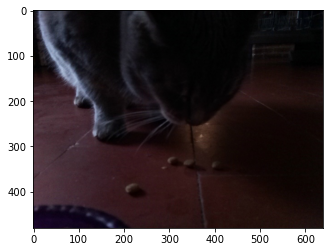

In [2]:
img = cv2.imread('test003.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

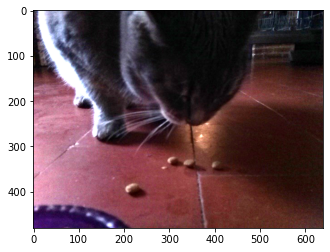

In [3]:
yen_threshold = threshold_yen(img)
bright = rescale_intensity(img, (0, yen_threshold), (0, 1))

plt.imshow(bright);

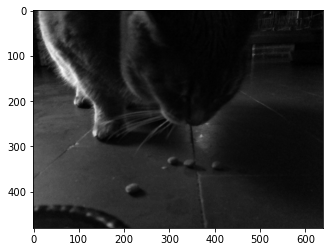

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray")

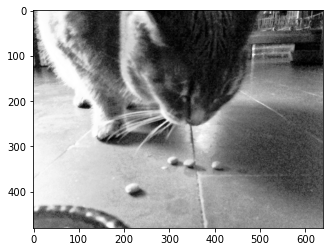

In [5]:
equ = cv2.equalizeHist(img_gray)
plt.imshow(equ, cmap="gray")

In [44]:
cam = cv2.VideoCapture(0)
ret, ref = cam.read()
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
# ref = cv2.equalizeHist(ref)
cam.release()

In [56]:
cam = cv2.VideoCapture(0)
fgbgMOG = cv2.bgsegm.createBackgroundSubtractorMOG(100,5,0.7,0)
try:
    while True:
        ret, frame = cam.read()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (41,41), 0)
#         gray = cv2.equalizeHist(gray)
        diff = cv2.absdiff(gray, ref)
        thresh = cv2.threshold(diff, 60, 255 , cv2.THRESH_BINARY)[1]
        thresh = cv2.dilate(thresh, None, iterations=2)
        x, y, w, h = cv2.boundingRect(thresh)
        contours, _ = cv2.findContours(thresh, cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE)
        
        areas = [int(cv2.contourArea(c)) for c in contours]
        areas = np.sort(areas)[::-1]
        for c in contours:
            if cv2.contourArea(c) > 50000:
            # Un rectangle incluant la zone
                (x, y, w, h) = cv2.boundingRect(c)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)



        cv2.imshow("", frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
finally:
    cam.release()
    cv2.destroyAllWindows()

In [80]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

fgbg = cv2.createBackgroundSubtractorMOG2()

while(1):
    ret, frame = cap.read()
    if not ret:
        break

    fgmask = fgbg.apply(frame)
    thresh = cv2.threshold(fgmask, 125, 255 , cv2.THRESH_BINARY)[1]
    thresh = cv2.dilate(thresh, None, iterations=2)
    x, y, w, h = cv2.boundingRect(thresh)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE)
    
    areas = np.array([cv2.contourArea(c) for c in contours])
    print(areas[areas > 500])
    for c in contours:
            if cv2.contourArea(c) > 50000:
            # Un rectangle incluant la zone
                (x, y, w, h) = cv2.boundingRect(c)
                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow('frame',frame)
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

[306081.]
[  1717.  105357.5    860.5    501.     507.     828.5    502.5    956.
    509.    4269.5    515. ]
[ 1220.5   565.5  5189.   1073.   2603.5  1996.5 32417.   1477.5 10622.5
  1207. ]
[ 874.  2264.5 1262.  3214.5 1827.5 3455. ]
[1166.5  584.  4642.  1353.5 2873.  1178.   576.5  764.5 1637.   914.5
 9557.5 1211.5 9521. ]
[1002.   632.   977.  2443.5  614.5 3121.5 3305.   793.5  597.   911.
 1974.5 2878.   588.5 7329.5 1766. ]
[  877.   1720.5  2784.   2504.5 36963.5  6066. ]
[  972.5   678.5   558.5  6201.  30258.   6808.5]
[ 1128.5  2066.    724.5   910.   1499.5  2922.    729.  15149.5]
[ 1175.   2438.5   588.   1114.5 24720.5  1225.    627. ]
[ 1194.5  1422.    756.    883.5 24023.   1027.    511.5]
[ 1343.5  1660.   1056.   1067.    960.  26067.   1204.5]
[ 1357.    838.    757.5   735.5  1108.    600.  12150.5  1166.5 11925. ]
[ 1182.    599.    640.5   884.5   698.5 24019.5  1132.5]
[  951.5   795.5   577.    566.   1003.    646.5 25979.   1259.5]
[ 1074.    564.5 34832.